# 1 cleaning data

## 1. 1 use siri equation to find outlier

In [1]:
rm(list=ls())
setwd('C:/Users/Tansu/OneDrive/Course Files/628/Module 2')
bodyfat=read.csv('BodyFat.csv')
head(bodyfat)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
<int>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


## 1.1.1 check the maximum factor value entry

In [19]:
summary(bodyfat)

      IDNO           BODYFAT         DENSITY           AGE       
 Min.   :  1.00   Min.   : 0.00   Min.   :0.995   Min.   :22.00  
 1st Qu.: 63.75   1st Qu.:13.10   1st Qu.:1.041   1st Qu.:35.75  
 Median :126.50   Median :19.00   Median :1.055   Median :43.00  
 Mean   :126.50   Mean   :18.95   Mean   :1.055   Mean   :44.88  
 3rd Qu.:189.25   3rd Qu.:24.60   3rd Qu.:1.070   3rd Qu.:54.00  
 Max.   :252.00   Max.   :45.10   Max.   :1.109   Max.   :81.00  
     WEIGHT          HEIGHT        ADIPOSITY          NECK      
 Min.   :118.5   Min.   :29.50   Min.   :18.10   Min.   :31.10  
 1st Qu.:159.0   1st Qu.:68.25   1st Qu.:23.10   1st Qu.:36.40  
 Median :176.5   Median :70.00   Median :25.05   Median :38.00  
 Mean   :178.9   Mean   :70.15   Mean   :25.44   Mean   :37.99  
 3rd Qu.:197.0   3rd Qu.:72.25   3rd Qu.:27.32   3rd Qu.:39.42  
 Max.   :363.1   Max.   :77.75   Max.   :48.90   Max.   :51.20  
     CHEST           ABDOMEN            HIP            THIGH      
 Min.   : 79.30 

In [20]:
which.min(bodyfat$DENSITY)

[1] 216

The 216th guy has a density<1 

In [3]:
as.matrix(bodyfat[216,])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
216,216,45.1,0.995,51,219,64,37.6,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


The 182th guy has bodyfat=0

In [4]:
as.matrix(bodyfat[182,])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
182,182,0,1.1089,40,118.5,68,18.1,33.8,79.3,69.4,85,47.2,33.5,20.2,27.7,24.6,16.5


Plot Bodyfat~1/density beacause from the formula
$$ \text{Percentage of Body Fat} = \dfrac{495}{\text{Body Density}} - 450 $$
there should be a linear relationship between the Bodyfat and the inverse of the density

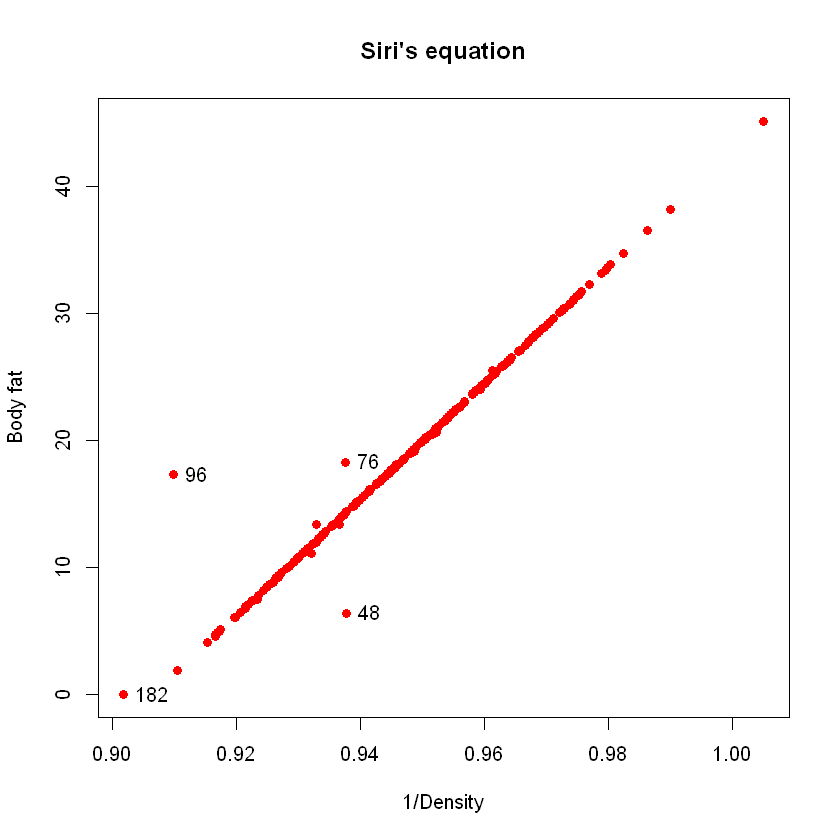

In [5]:
reverse.density=1/bodyfat$DENSITY
plot(bodyfat$BODYFAT ~ reverse.density,main="Siri's equation",xlab="1/Density",ylab="Body fat",pch=19,col="red")
text(reverse.density[c(96, 182 ,48 ,76)],bodyfat$BODYFAT[c(96, 182 ,48 ,76)] ,c(96, 182 ,48 ,76),p=4) #96 182 48 76

From the plot above ,there are some points need to check

In [6]:
as.matrix(bodyfat[c(48 ,76,96, 182 ),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
48,48,6.4,1.0665,39,148.50,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9
76,76,18.3,1.0666,61,148.25,67.50,22.9,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3
96,96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
182,182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5


### 1.1.2 Check the outliers

####   48th entry
for the 48 its bodyfat is 6.4 which shows something wrong, then use the siri function to compute the bodyfat

In [7]:
as.matrix(bodyfat[48,])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
48,48,6.4,1.0665,39,148.5,71.25,20.6,34.6,89.8,79.5,92.7,52.7,37.5,21.9,28.8,26.8,17.9


In [8]:
a=495/bodyfat$DENSITY[48]- 450
a#14.13502 which is much more reliable
bodyfat$BODYFAT[48]=a

[1] 14.13502

#### 96th entry
At first we check the adjacent entries to find the abnormal component of 96th entry

In [9]:
as.matrix(bodyfat[c(96,97,98),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
96,96,17.3,1.0991,53,224.50,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4
97,97,10.1,1.0770,38,188.75,73.25,24.8,37.5,99.1,91.6,102.4,60.6,39.4,22.9,31.6,30.1,18.5
98,98,11.1,1.0730,50,162.50,66.50,25.9,38.7,99.4,86.7,96.2,62.1,39.3,23.3,30.6,27.8,18.2


we can find from 97 and 98 that,when density increase ,the bodyfat should decrease,however this time when density goes up the bodyfat goes up . 
if we use the density to compute the bodyfat then it should be

In [10]:
495/bodyfat$DENSITY[96]- 450

[1] 0.3684833

which is impossible compare with the bodyfat with others, hence this time we use bodyfat to compute density

In [11]:
bodyfat$DENSITY[96]=495/(bodyfat$BODYFAT[96]+450)
as.matrix(bodyfat[96,])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
96,96,17.3,1.059277,53,224.5,77.75,26.1,41.1,113.2,99.2,107.5,61.7,42.3,23.2,32.9,30.8,20.4


#### 182th entry

In [12]:
 as.matrix(bodyfat[c(182,183,184),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
182,182,0.0,1.1089,40,118.50,68.00,18.1,33.8,79.3,69.4,85.0,47.2,33.5,20.2,27.7,24.6,16.5
183,183,11.9,1.0725,40,145.75,67.25,22.7,35.5,95.5,83.6,91.6,54.1,36.2,21.8,31.4,28.3,17.2
184,184,12.4,1.0713,40,159.25,69.75,23.0,35.3,92.3,86.8,96.1,58.0,39.4,22.7,30.0,26.4,17.4


the bodyfat is 0 so we should use density to compute

In [17]:
495/bodyfat$DENSITY[182]- 450

[1] -3.611687

after applying siri's equation,the bodyfat is negative ,which is impossible. hence we should delect 182,neither the bodyfat nor density  are correct.

#### 76th entry

In [14]:
as.matrix(bodyfat[c(72,76),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
72,72,9.4,1.0788,55,146.75,68.75,21.9,38.7,88.5,82.8,95.5,58.9,37.6,21.6,30.3,27.3,18.3
76,76,18.3,1.0666,61,148.25,67.50,22.9,36.0,91.6,81.8,94.8,54.5,37.0,21.4,29.3,27.0,18.3


compare these two ,we can see that the bodyfat has a large diff. however the bmi not shows much diff and the other variables shows the 76 should not be fat hence the bodyfat of 76 might be wrong 

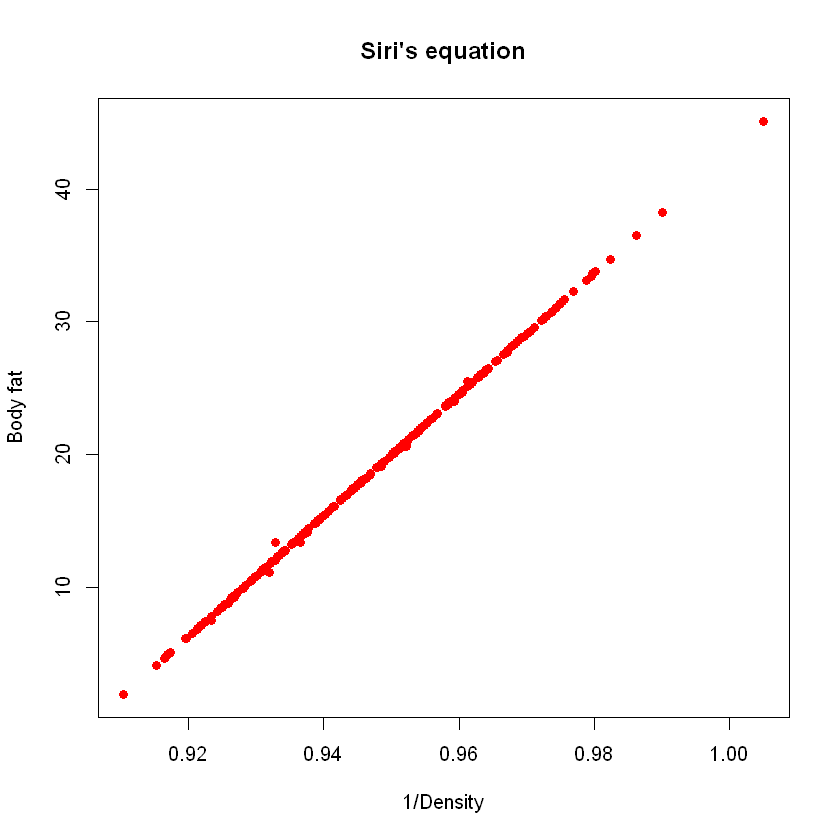

In [15]:
bodyfat$BODYFAT[76]=495/bodyfat$DENSITY[76]- 450
reverse.density=1/bodyfat$DENSITY
plot(bodyfat$BODYFAT[-182] ~ reverse.density[-182],main="Siri's equation",xlab="1/Density",ylab="Body fat",pch=19,col="red")

## 1.2 use BMI to find outliers bmi=weight/(height)^2

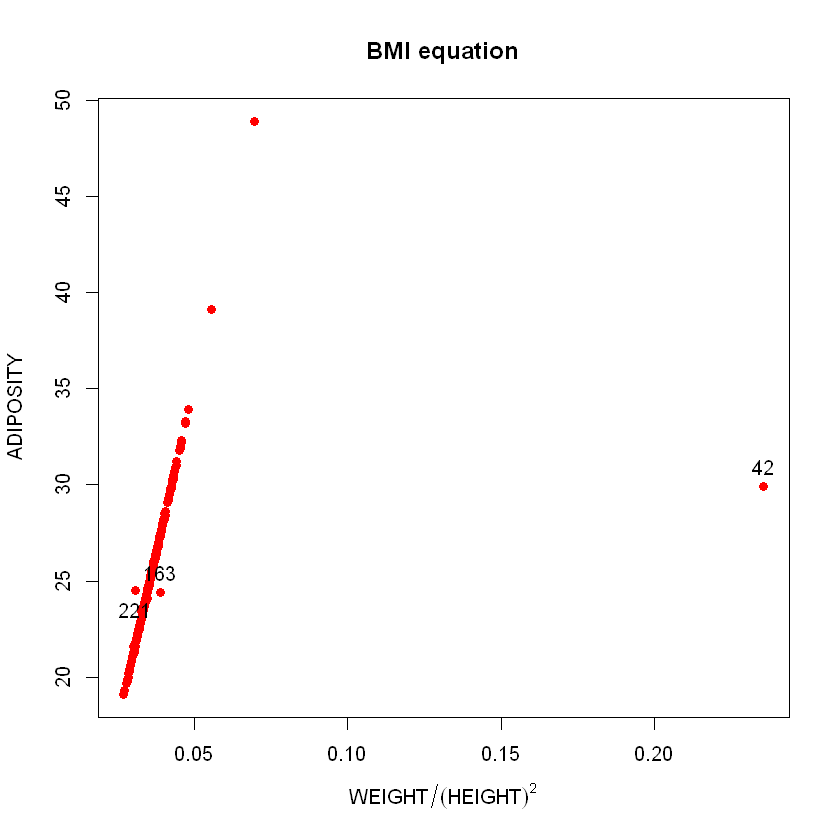

In [23]:
bmi=bodyfat$WEIGHT/(bodyfat$HEIGHT)^2
plot(bodyfat$ADIPOSITY[c(-182,-216)] ~ bmi[c(-182,-216)],main="BMI equation",xlab=expression(WEIGHT/(HEIGHT)^2),ylab="ADIPOSITY",pch=19,col="red")
text(bmi[c(42,163)],bodyfat$ADIPOSITY[c(42,163)]  ,c(42,163),p=3) #42,163,221
text(bmi[c(221)],bodyfat$ADIPOSITY[c(221)]  ,c(221),p=1) #42,163,221

###  Check outliers

#### 42th entry

In [25]:
as.matrix(bodyfat[c(41,42,43),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
41,41,33.1,1.0217,45,262.75,68.75,39.1,43.2,128.3,126.2,125.6,72.5,39.6,26.6,36.4,32.7,21.4
42,42,31.7,1.0250,44,205.00,29.50,29.9,36.6,106.0,104.3,115.5,70.6,42.5,23.7,33.6,28.7,17.4
43,43,30.4,1.0279,48,217.00,70.00,31.2,37.3,113.3,111.2,114.1,67.7,40.9,25.0,36.7,29.8,18.4


the heigth of the 42 is only 29.5 which might be mistake

In [29]:
sqrt(bodyfat$WEIGHT[42]/bodyfat$ADIPOSITY[42])

[1] 2.618432

Use other data to contrust a model between adiposity and bmi

In [30]:
model.bmi=lm(bodyfat$ADIPOSITY[-42]~bmi[-42])
summary(model.bmi)


Call:
lm(formula = bodyfat$ADIPOSITY[-42] ~ bmi[-42])

Residuals:
     Min       1Q   Median       3Q      Max 
-3.02751 -0.02632  0.00396  0.02963  2.76506 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.1942     0.1174   1.654   0.0994 .  
bmi[-42]    698.6151     3.2188 217.042   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2648 on 249 degrees of freedom
Multiple R-squared:  0.9947,	Adjusted R-squared:  0.9947 
F-statistic: 4.711e+04 on 1 and 249 DF,  p-value: < 2.2e-16


then ADIPOSITY=0.1942+698.6151*bmi

In [28]:
bmi.42=(bodyfat$ADIPOSITY[42]-0.1942)/698.6151
height=sqrt(bodyfat$WEIGHT[42]/bmi.42)
height

[1] 69.4345

hence the height of the 42 guy is 69.4345 much reliable

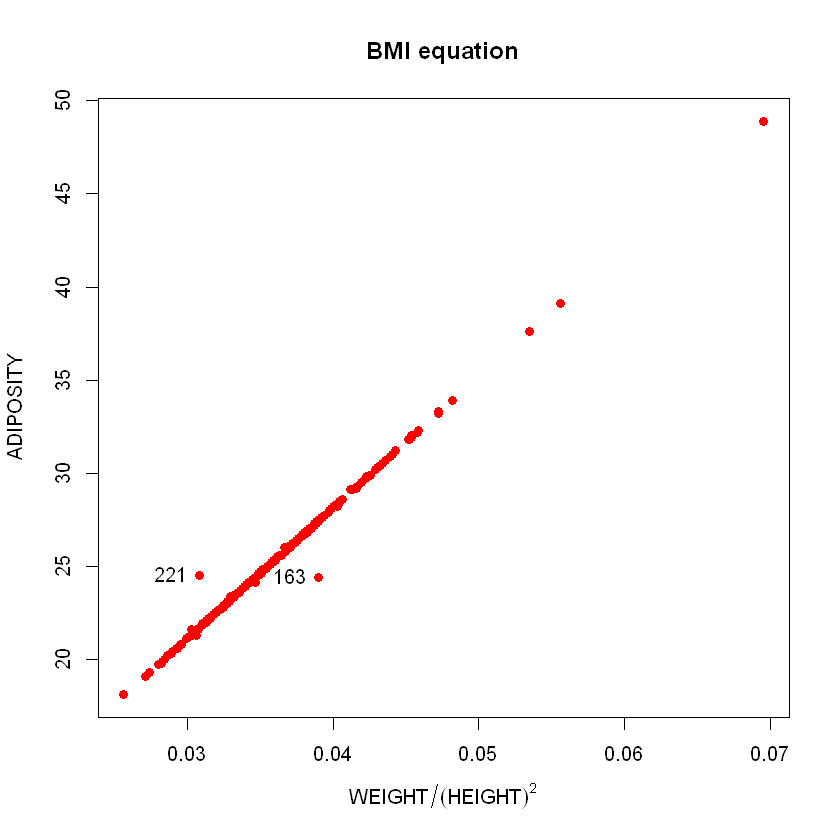

In [32]:
bodyfat$HEIGHT[42]=height
bmi=bodyfat$WEIGHT/(bodyfat$HEIGHT)^2
plot(bodyfat$ADIPOSITY ~ bmi,main="BMI equation",xlab=expression(WEIGHT/(HEIGHT)^2),ylab="ADIPOSITY",pch=19,col="red")
text(bmi[c(163,221)],bodyfat$ADIPOSITY [c(163,221)] ,c(163,221),p=2) #96 182 48 76

#### 221th entry

In [34]:
as.matrix(bodyfat[c(116,123,218,221),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
116,116,16.7,1.0607,40,158.00,69.25,23.4,36.3,97.0,86.6,92.6,55.9,36.3,22.1,29.8,26.3,17.3
123,123,14.8,1.0652,40,160.25,68.75,23.9,36.9,99.3,83.3,97.5,60.5,38.7,22.6,34.4,28.0,17.6
218,218,8.2,1.0819,51,154.50,70.00,22.2,36.9,93.3,81.5,94.4,54.7,39.0,22.6,27.5,25.9,18.6
221,221,12.7,1.0706,54,153.25,70.50,24.5,38.5,99.0,91.8,96.2,57.7,38.1,23.9,31.4,29.9,18.9


we see that for 221 ,the weight and height are similar with the 218. however their ADIPOSITY are diff
there must be one wrong values among these three variables,we can compare the rest variables of 221 are larger than 218, 
but the weight is smaller,and then compare 211 with 116,123...
hence the weight of 221 might be wrong

In [42]:
bmi.221=(bodyfat$ADIPOSITY[221]-0.1942)/698.6151
weight=bmi.221*(bodyfat$HEIGHT[221])^2
bodyfat$WEIGHT[221]=weight
weight

[1] 172.922

#### 163th entry

In [43]:
as.matrix(bodyfat[c(158,163,167,170),])

,IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
158,158,10.5,1.0761,28,182.50,72.25,24.6,37.0,98.5,90.8,102.5,60.8,38.5,25.0,31.6,28.0,18.6
163,163,13.3,1.0690,33,184.25,68.75,24.4,40.7,98.9,92.1,103.5,64.0,37.3,23.5,33.5,30.6,19.7
167,167,21.4,1.0492,35,166.25,68.00,25.3,38.5,99.1,90.4,95.6,55.5,34.2,21.9,30.2,28.7,17.7
170,170,16.5,1.0610,35,172.75,69.50,25.2,37.6,99.1,90.8,98.1,60.1,39.1,23.4,32.5,29.8,17.4


comparing 163 and 167, the value of 163 are larger than 167 with the same height

it is reasonable to say 163 is fatter  than 167 based on the bodyfat and density comparison

but the ADIPOSITY of 163 is smaller

hence we guess there is a mistake when we compute the ADIPOSITY.

What's more weight 163>158,height:163<158,the ADIPOSITY should be 163>158,but the data is not

In [46]:
bmi.163=bodyfat$WEIGHT[163]/(bodyfat$HEIGHT[163])^2
adi=0.1942+698.6151*bmi.163
bodyfat$ADIPOSITY[163]=adi

In [ ]:
#check the bmi equation again
bmi=bodyfat$WEIGHT/(bodyfat$HEIGHT)^2
plot(bodyfat$ADIPOSITY ~ bmi,main="BMI equation",xlab=expression(WEIGHT/(HEIGHT)^2),ylab="ADIPOSITY",pch=19,col="red")
text(bmi[c(42,163,221)],bodyfat$ADIPOSITY[c(42,163,221)]  ,c(42,163,221),p=2) #96 182 48 76
#it seems good

using these two criterion we only need to delet 182,216, other outliers will be replaced by the imputations.

## 1.3  use the Cook's distance to detect outliers

Cook's distance or Cook's D is a commonly used estimate of
the influence of a data point when performing a least-squares regression
analysis
Rule of thumb: classify as leverages anything above 4/(n-p).

ERROR: Error in nrow(bodyfat_new): object 'bodyfat_new' not found


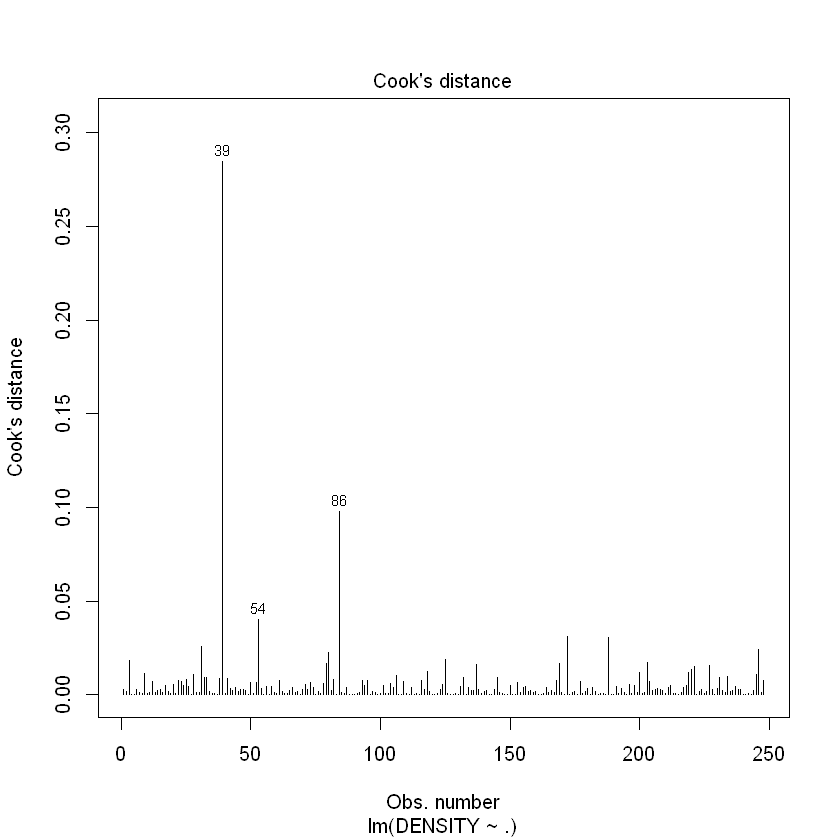

In [47]:
model=lm(DENSITY~ ., data=bodyfat[-c(48 ,76,96, 182 ),c(-1,-2)])
plot(model,which = 4)
n=nrow(bodyfat_new)
p=ncol(bodyfat_new)
abline(h = 4/(n-p),lty=2,col='red')
library(car)
influencePlot(model)
outlierTest(model,cutoff=0.05, n.max=10, order=TRUE)

Bonferroni Outlier Test
Description
Reports the Bonferroni p-values for testing each observation 
in turn to be a mean-shift outlier, based Studentized residuals 
in linear (t-tests), generalized linear models (normal tests), 
and linear mixed models.

we can see the 42 is a influntial point
only  29.5 height outlier
delect number 42 and fit the model again

In [ ]:
outlier=bodyfat[42,]

In [ ]:
model_1=lm(DENSITY~ ., data=bodyfat[-c(42,48 ,76,96, 182 ),c(-1,-2)])
summary(model_1)
layout(matrix(1:4, ncol=2))
plot(model_1)
layout(matrix(1:1, ncol=1))
plot(model_1,which = 4)
n=n-1#delet 42
abline(h = 4/(n-p),lty=2,col='red')
influencePlot(model_1)
outlierTest(model_1)

In [ ]:
#39 influential point
bodyfat[39,]#weight  363.15 pounds
## delect number 39 and fit the model again
model_2=lm(DENSITY~ ., data=bodyfat[-c(39,42,48 ,76,96, 182 ),c(-1,-2)])
summary(model_2)
layout(matrix(1:4, ncol=2))
plot(model_2)
layout(matrix(1:1, ncol=1))
plot(model_2,which = 4)
n=n-1#delet 39
abline(h = 4/(n-p),lty=2,col='red')
influencePlot(model_2)
outlierTest(model_2)
## delect number 221 and fit the model again
bodyfat[221,]
model_3=lm(DENSITY~ ., data=bodyfat[-c(39,42,48 ,76,96, 182,221 ),c(-1,-2)])
summary(model_3)
layout(matrix(1:4, ncol=2))
plot(model_3)
layout(matrix(1:1, ncol=1))
plot(model_3,which = 4)
n=n-1
abline(h = 4/(n-p),lty=2,col='red')
influencePlot(model_3)
outlierTest(model_3)
## delect number 86 and fit the model again
model_4=lm(DENSITY~ ., data=bodyfat[-c(39,42,48 ,76,86,96, 182,221 ),c(-1,-2)])
summary(model_4)
layout(matrix(1:4, ncol=2))
plot(model_4)
layout(matrix(1:1, ncol=1))
plot(model_4,which = 4)
n=n-1#delet 42
abline(h = 4/(n-p),lty=2,col='red')
influencePlot(model_4)

outlierTest(model_4)

  # After cleanning data

In [ ]:
# after cleaning the data the new dataset
bodyfat_new=bodyfat_new[-c(42,39,221,96,86),]


In [ ]:

##AIC BIC
model.new=lm(DENSITY~ ., data=bodyfat_new)
#both direction AIC
model.aic.both=step(model.new,direction = "both",k=2)
summary(model.aic.both)
#-2290.41,DENSITY ~ AGE + WEIGHT + HEIGHT + ADIPOSITY + NECK + ABDOMEN + HIP + THIGH + FOREARM + WRIST
model.bic.both=step(model.new,direction = "both",scope=list(lower=~1,upper=model),k=log(n))
summary(model.bic.both)
#-2274.24 DENSITY ~ WEIGHT + ABDOMEN + WRIST


###A rule of thumb: Good models are those that are within 2 AIC units of the lowest AIC value. Models with more than 10 AIC units above the lowest AIC value are generally not considered.
###AIC can result in overfitting.
###AIC and most other criteria do not have measure of variation and thus the rules are generally approximations.
##AICåBICåå¼å¥äºä¸æ¨¡ååæ°ä¸ªæ°ç¸å³çæ©ç½é¡¹ï¼BICçæ©ç½é¡¹æ¯AICçå¤§ï¼èèäºæ ·æ¬æ°éï¼æ ·æ¬æ°éè¿å¤æ¶ï¼å¯ææé²æ­¢æ¨¡åç²¾åº¦è¿é«é æçæ¨¡åå¤æåº¦è¿é«ã

#Hence choose the model lm(DENSITY ~ WEIGHT + ABDOMEN + WRIST)


In [ ]:

##cross validation
set.seed(101)
sample=sample(n, replace = F)
data=bodyfat_new[sample,]# change the order of the observation
folds=cut(seq(1,n),breaks=3,labels=FALSE)

In [ ]:

#first fold
trainindexes=which(folds!=3)
traindata=data[trainindexes, ]

testindexes=which(folds==3)
testdata=data[testindexes, ]
nrow(testdata)

model.new=lm(DENSITY~ ., data=traindata)
#both direction AIC
model.aic.both=step(model.new,direction = "both",k=2)
summary(model.aic.both)
#-1530.48,DENSITY ~ WEIGHT + HEIGHT + ADIPOSITY + NECK + ABDOMEN + HIP + THIGH
model.bic.both=step(model.new,direction = "both",k=log(n))
summary(model.bic.both)
#-1511.43 DENSITY ~ WEIGHT + NECK + ABDOMEN